# <b>機械学習の基礎-1</b>
経験からの学習により自動で改善するコンピューターアルゴリズムもしくはその研究領域で、人工知能の一分野であり、データサイエンスの中核技術。  
「訓練データ」もしくは「学習データ」と呼ばれるデータを使って学習し、学習結果を使って何らかのタスクをこなす。  

機械学習のタスクは下記の3つに大別される。  
* 回帰(regression): 連続値を予測する
    応用例：　株価予想、ダイヤの価格予想　→過去データからどれくらいの価格で取引されるか予測する
    <br></br>
* 分類/識別(classification): カテゴリーやクラス，ラベルと呼ばれる”種類”を判別する.  
    応用例：　医用画像診断、迷惑メールフィルタ、顔認証、音声認識
    <br></br>
* クラスタリング(clustering): データをカテゴリーやクラス，ラベルと呼ばれる”種類”に分別(グループ化)していく．  
    分類はあらかじめ与えられたクラス（犬、猫など）に分類するのに対して、クラスタリングは自律的にデータを傾向ごとのグループに分類する。  
    応用例：　DNA組成にもとづく生物の分類
    <br></br>
    
本ドキュメントの参考資料：  
* 米国データサイエンティストのブログ　https://datawokagaku.com/
* [Udemy「【前編】米国データサイエンティストがやさしく教える機械学習超入門【Pythonで実践】」](https://www.udemy.com/share/1077bS3@bUCyxS-VD-KW9E4jHmBJMoj_5PK2dfHpvowX0VmKHCHS13OuPdwG4hFdoF_2hk-7/)
* https://ja.wikipedia.org/wiki/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92


## <b>○ 線形回帰</b>

既存データから欲しい値（目的変数）を予測するのが機械学習における回帰である。  
例えば、 ある駅から半径5km以内でランダムに物件情報（家賃、広さ）を10件取得したとする。  
（10件のデータはランダムサンプルであり、背後には無数のデータ(母集団)があることに注意）  
このとき、既存データからサンプルにないデータ（例えば広さ70 $m^2$）における家賃を予測するのに回帰を使う。  
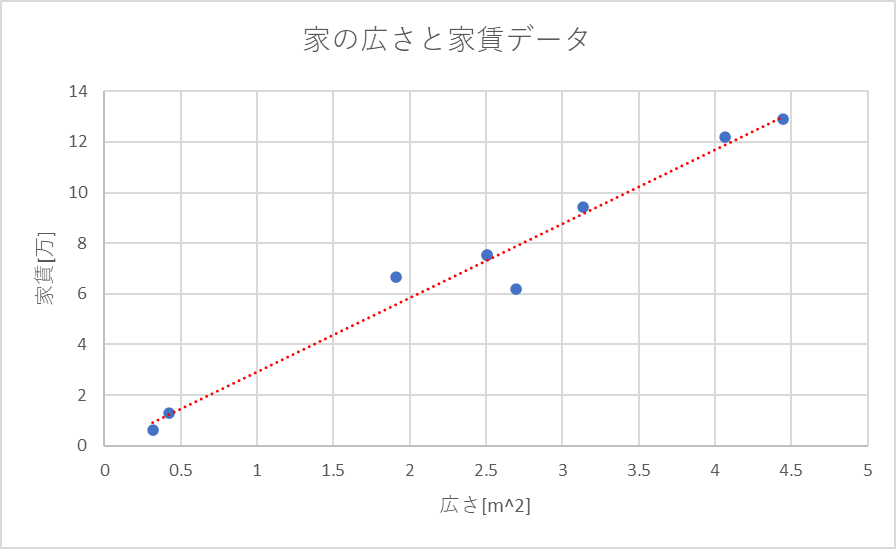

一般に、予測したい値とそれを決定づける変数の間の関係は下記のように書ける。
$$Y = f(X) + \epsilon$$  
$Y$：　真の目的変数(ex.家賃)の値  
$X$：　特徴量(ex.広さ)。もちろん、上記の例では広さ以外にも築年数など複数の特徴量が考えられるので一般に多次元。  
$f$：　真の関数。一般に形はわからない。  
$\epsilon$：　誤差項。特徴量では説明できない$Y$の変化を表す。測定値であれば正規分布をとる（後述）。  
※統計学では特徴量のことを説明変数と言ったりする。  

一般に真の関数$f$の形はわからないので、機械学習では$f$を推測して、$Y$の予測値$\hat{Y}$を求める。（超重要）    
この推測した関数$\hat{f}$のことをモデルという。
$$\hat{Y} = \hat{f}(X)$$  
$\hat{Y}$：　予測値  
$\hat{f}$：　真の関数の推測値  
※誤差項は機械学習から予測することはできない。



線形回帰では$\hat{f}$が'線形'であると仮定する。（線形回帰モデルという）  
$$\hat{f}(X)=\theta_0+\theta_1X_1+\theta_2X_2+ ... \theta_nX_n$$
$\theta_j$：$j$番目のパラメータ  
$X_j$：$j$番目の特徴量の値  

上記の最適なパラメータをサンプルから推定することを「学習する」という。  
よく言う「機械学習のモデルを学習させる、トレーニングする」というのは最適なパラメータをコンピュータに算出させることである。  

※上記はn次元空間の直線のようだ。n=1のときは2次元（平面）での直線、n=2のときは3次元空間の直線を表している。  
x,y,zの軸があるとき、y=ax+bz+cみたいな。  

### - 最小二乗法(least squares)
線形回帰においては最小二乗法を用いて、モデルの最適なパラメータを求める。  
最小二乗法は残差（サンプルデータとモデルの予測値との差）の二乗和が最小になるようなパラメタを算出する（直線を引く）方法である。  
残差が最小になるような直線であれば真の値と予測値の乖離が最小限になるだろうという考え方。  

上記の家賃の例では、  
サンプルデータ$Y$の個々の値を$y_i$、この値に対応する線形回帰モデルからの予測値を$\hat{y}_i$とすると、  
このときの残差$e_i$の２乗和は、  
$$\sum_{i=1}^{m}{e_i}^2$$
$$=\sum_{i=1}^{m}{(y_i-\hat{y}_i)}^2$$  
と書ける。$m$はサンプルデータ数とする。（以降も同様）  
また、$\hat{y}_i$は線形回帰モデルに従うと仮定しているので、特徴量が家賃$X_1$のみ($n=1$)と考える場合は、$\hat{y}_i=\theta_0+\theta_1x_i$とかける。よって、  
$$\sum_{i=1}^{m}{e_i}^2 = \sum_{i=1}^{m}{(y_i-(\theta_0+\theta_1x_i))}^2$$  

上式の値を最小にするようなパラメタは最急降下法で解く。

※この例では特徴量が家賃１つのみとしているので、$X_1$の個々の値は$x_{i1}$ではなく$x_i$のように省略して書いている。  
　特徴量が複数ある場合は、$X_1$の個々の値は$x_{i1}$、$X_2$の個々の値は$x_{i2}$のように明確に区別して表記することに注意。  
 
※残差と誤差の混同に注意。どっちもエラーとは呼ぶ。

※!! 注意 !!  
「平均値は各値からの差の2乗の合計 (平方和) を最小にする」という定理より、残差を最小にするのは真の値$y$の平均値$\bar{y}$だと  
考えるのは誤り。この定理は数列(ここではサンプルデータ)と任意の"定数"との差の平方和を最小にする定数は平均値であるという意味であり、  
一般に$\hat{y}_i$は特徴量を変数に持つ関数なのでこの定理を適用しようとするのがそもそも間違い。複雑なモデルであればサンプルデータに近い回帰曲線が得られるので、  
この場合は当然ながら真の値の平均値との差の平方和よりも、予測値（モデル）との差の平方和の方が小さくなる。  

### - 最急降下法(gradient descent)
関数の最小値を探索するアルゴリズム。  
最急降下法は最適化問題（関数が最小になる変数の値を探索すること）を解く勾配法のアルゴリズムの一つである。  
関数値が小さくなる方へ関数のパラメタを少しずつ動かし、最適なパラメタを探っていく（=学習）。

最小値を探索する対象の関数を損失関数(Loss function)といい、$L$で表わす。※残差は真の値から損失していると考える  
特徴量が一つの線形回帰の場合の損失関数は下記。  
$$L(\theta_0,\theta_1)=\frac{1}{m}\sum_{i=1}^{m}{e_i}^2 = \frac{1}{m}\sum_{i=1}^{m}{(y_i-(\theta_0+\theta_1x_i))}^2$$

※前の章の残差の式をそのまま損失関数としてもよいが、計算を楽にするためにサンプル数mで両辺を割った残差の二乗の平均を使うことが多い。  
　この残差の二乗の平均をMSE(mean squared error)という。よく回帰アルゴリズムの評価指標として使われる。  

最急降下法では下記の流れで最適なパラメタを探る。具体的な実装は「ML_notebook.ipynb」の方に記す。
1. 損失関数のパラメタをそれぞれ偏微分し、ある点$\theta_0^{(0)},\theta_1^{(0)}$における勾配（2次元で見ると接線の傾き）を求める。  
    この勾配を勾配ベクトルという。  
$$\frac{\partial}{\partial \theta_0} L(\theta_0^{(0)})$$
$$\frac{\partial}{\partial \theta_1} L(\theta_1^{(0)})$$  

2. 勾配方向とは逆の向き（$L$が小さくなる方向）に$\theta_0^{(0)}→\theta_0^{(1)}$、$\theta_1^{(0)}→\theta_1^{(1)}$のように動かす。  
    このとき、移動先の点は下記の式で決める。
    $$\theta_0:=\theta_0-\alpha \frac{\partial}{\partial \theta_0}L(\theta_0,\theta_1)$$  
    $$\theta_1:=\theta_1-\alpha \frac{\partial}{\partial \theta_1}L(\theta_0,\theta_1)$$  
    ※$:=$は代入演算子。プログラミングのイコールと同じ。  
    すなわち、偏微分係数（勾配）が正のときは$\theta$が小さくなる方向へ、 負の時は$\theta$が大きくなる方向へ$\theta$を移動させるということ。  
    $\theta_0,\theta_1$はそれぞれ同時に更新していく（更新後の$\theta_0$を$\theta_1$の式の右辺には使わない）ことに注意。つまり右辺は更新前の点とする。  
    $\alpha$は学習率といい、学習の際の重要なパラメータ(ハイパーパラメータ)である。  
    学習率が高ければ高いほど、より大きく$\theta$が動くのでより早く最適解にたどり着くことが期待できる。（詳細は後述） 
    
3. 1.～2.を繰り返し、ほぼ移動しなくなったときの$\theta$を最適なパラメタとする。


詳細な説明：https://datawokagaku.com/gradient_descent/

### - 最急降下法の注意点
* 最適解(global optima)ではなく局所解(local optima)にたどり着くことがある。  
→初期値の取り方によっては最小値ではなく極小値に引っかかってしまうということ。  
→対処法としては、初期値を複数とって最小となる値のパラメタを最適解とする。  

* 学習率($\alpha$)が大きすぎると、発散して学習が進まない。  
→学習率が大きい、すなわちパラメタの変化量が大きいと、最適解を通り越して更新してしまう。  
→これが繰り返されると、損失関数の値は発散していく。  
→対処法としては、収束に向かうように学習率を小さく調節する。  



### - 正規方程式(normal equation)
最急降下法を使わずに解析的に最適なパラメータθを求める方程式。  
一発で確実に解を求めることが可能。※線形回帰モデルでのみ適用可能

n項目ある特徴量がそれぞれm個のデータを持つとき、特徴量を下記のようにm x (n+1)の行列で表す。  
ここで、０番目（一番左の列）の特徴量は全て1とする（バイアス項）。  
$X = \left(
\begin{matrix} 
x_{10} & x_{11} & ... & x_{1n}\\ 
x_{20} & x_{21} & ... & x_{2n}\\
. & . & ... & .\\
x_{m-10} & x_{m-11} & ... & x_{m-1n} \\
x_{m0} & x_{m1} & ... & x_{mn}
\end{matrix} 
\right)$  

そして線形回帰モデルのそれぞれの項目に対応するパラメタを下記のようにn+1行の列ベクトルで表わす。  
$\theta = \left(
\begin{matrix} 
\theta_{0} \\ 
\theta_{1} \\
. \\
. \\
. \\
\theta_{n-1}  \\
x_{n} \\
\end{matrix} 
\right)$  

目的変数の予測値$\hat{y}$も同様にm行の列ベクトルで表わせる。  
$\hat{y} = \left(　
\begin{matrix} 
\hat{y}_{1} \\ 
\hat{y}_{2} \\
. \\
. \\
. \\
\hat{y}_{m-1}  \\
\hat{y}_{m} \\
\end{matrix} 
\right)$  

すると、線形回帰モデルは下記で表わせる。  
$\hat{y}=X\theta$

これを損失関数の式に代入して整理すると、  
損失関数$L(\theta)$を最小にする（※）パラメタの方程式は下記となる。（導出は講義スライド参照）  
これが正規方程式である。($y$は$\hat{y}$と同形の列ベクトル)  
$$\theta = (X^TX)^{-1}X^Ty$$  
※正確には極値をとるとき

### - 正規方程式の注意点
1. 特徴量の項目数nが多すぎると$(X^TX)^{-1}$の計算に時間がかかる  
→$(X^TX)$は$(n+1)×(n+1)$の正方行列であり、nが大きいと巨大な行列になってしまい、逆行列を計算するのに時間がかかる。  
→対処法としては最急降下法を使って解くこと。最急降下法はnが大きくても正規方程式ほど影響なく解くことができる。  

2. 特徴量同士に強い相関があると$(X^TX)$は$(X^TX)^{-1}$を求めることができない。  
→例えば、特徴量1、特徴量2の2項目の特徴量があり、特徴量2は特徴量1の整数倍の関係になっているような場合を強い相関があるという。  
→このような特徴量同士の強い相関を多重共線性 (multicollinearity, マルチコリニアリティ)という。  
→多重共線性があると逆行列を求める際のdetがゼロになり、無限大になってしまうため、逆行列を求められない。  
→対処法としてはどちらかの特徴量を落とす、または特徴量1，2を組み合わせて新たな特徴量を作ること。  

3. 特徴量の項目数(n+1)（つまりバイアス項含む）がデータ数(m)を上回る場合，回帰のパラメータを特定できない  
→パラメタ$\theta$の数もn+1となるので、解析的に連立方程式を解くことができなくなるため。これは正規方程式によらずすべてのアルゴリズムに言える。    
→対処法としては特徴量を減らす、またはデータを増やすこと。  

※特徴量の項目数がデータ数を上回ることは現実的にあり得る。（DNAデータなど）

## ○ 特徴量スケーリング(feature scaling)
前処理（機械学習のモデルを学習させる前に入力データに処理を施すこと）の一つ。  
尺度が異なる特徴量(広さと築年数など)を揃える。大きく分けて「標準化」と「正規化」がある。

最急降下法のような勾配法を使用したアルゴリズムや距離を使うアルゴリズムでは特徴量スケーリングが必要。  
例えば、最急降下法のパラメータ更新の下式では特徴量のスケールがそれぞれ異なれば、その係数$\theta$（パラメータ）の  
スケールもそれぞれ異なる。したがって、$\theta$が更新される（点を移動する）スピードもそれぞれ異なってしまい、  
最適解へたどり着くスピードがパラメタによって異なってしまう。  
$$\theta:=\theta-\alpha \frac{\partial}{\partial \theta}L(\theta)$$   
その他、データ間の距離を使うようなアルゴリズムでも同様。  

正規方程式のような解析的に解を求めるアルゴリズムや決定木を使うアルゴリズムでは不要。

### - 標準化(standardize)
それぞれの特徴量空間のスケールを合わせる。（復習：統計学の基礎）  
平均0, 標準偏差1に揃える。平均を引いて標準偏差で割る。標準化することで学習を安定させることが可能。  
例えば、広さ($m^2$)、築年数（年）が特徴量の場合はスケールが全く違うので、それぞれ標準化する。  


### - 正規化(normalization)
値の範囲を0〜１にrescaleする処理。$\frac {x-x_{min}}{x_{max} - x_{min}}$をそれぞれの値に適用する。  
標準化と混同しやすいので注意。標準化は値の範囲は0-1にはならない。  
外れ値があると、とりうる値が偏ってしまう。例えば最大値が他の値より異常に大きい場合、他の値は0-1の中で小さい値ばかり取ることになる。  
最小の値$x_{min}$は0に， 最大の値$x_{max}$は1になる。


### - 特徴量スケーリングの注意点
リスケールするのはあくまでも特徴量の項目毎であることに注意。  
広さの平均・標準偏差・最大最小値、築年数の平均・標準偏差・最大最小値をそれぞれ求めて、標準化・正規化の式に入れる。  
特徴量の行列Xの列ごとに標準化していくイメージ。  
$X = \left(
\begin{matrix} 
x_{10} & x_{11} & ... & x_{1n}\\ 
x_{20} & x_{21} & ... & x_{2n}\\
. & . & ... & .\\
x_{m-10} & x_{m-11} & ... & x_{m-1n} \\
x_{m0} & x_{m1} & ... & x_{mn}
\end{matrix} 
\right)$  

また、目的変数のリスケールは不要である。
実務で機械学習のモデルを構築するときは、サンプルデータの全てをパラメタ学習用のデータとして使うことはなく、  
通常は学習データとテストデータ（学習したモデルの精度をテストする用のデータ）に分ける。  
このとき、学習データのリスケールに使った平均・標準偏差・最大最小値をテストデータのリスケールにも使用することに注意。  
つまり、学習データを下付き文字$train$、テストデータ$test$として標準化の式をそれぞれ表すと、  
学習データの標準化の式：  
$$\frac {x_{train}-\bar{x}_{train}}{s_{train}}$$  
テストデータの標準化の式：  
$$\frac {x_{test}-\bar{x}_{train}}{s_{train}}$$  

### - 標準化と正規化どちらを使うべきか？
* 明確な基準やルールは無い．扱うデータや問題によってまちまち
* 生データ，標準化したデータ，正規化したデータで学習したそれぞれのモデルの精度を比較して決めるのが良い
* 標準化はデータが正規分布に従っている場合は特に効果的
* 外れ値の影響を受けたくない場合は標準化を使う。
* 概ね標準化の方が使われやすく好まれる


## ○ 線形回帰の結果解釈
現実的に目的変数の背後にある真の関数の形が完全に線形であることは稀である。  
なので、線形回帰モデルは精度の面では非線形のモデルに劣ることが多い。  
一方、線形回帰モデルを単純な形ゆえに解釈性（式の意味のわかりやすさ）が高いため、精度が低くても解釈性を重視する場合は使われることがある。  


### - 線形回帰の係数
係数（パラメタ）は、特徴量の値が1単位増えた時の目的変数が平均的に増える量といえる。  
特徴量が標準化されている場合、係数の大きさはその特徴量の影響力の大きさを表す。（標準化されていない場合、係数ごとの大小比較はできない）  

例）家賃と広さの線形回帰モデル学習結果  
$rent = 7 + 0.27×space$  
→spaceが1$m^2$増えると、rentは "平均的に" 0.27万円上がる。  

※特徴量を標準化した場合は、標準化後の特徴量の値が1増えたときに目的変数がどう変わるかを表す意味になることに注意。  
※また、標準化した場合、単位はなくなる。

データ採取、分析のコスト等の観点から、特徴量の影響力の大きさを解釈するにあたって係数が0か否かを統計的に判断することは重要である。  
何故なら、統計的に0ではないことをいう(=統計的有意差がある)ことで、その特徴量は目的変数に影響を与えるものであることが言えるからである。  
また、0であれば、予測に関係ない特徴量のデータを無駄に取る必要がなくなり、不要な特徴量を減らすことでモデルを軽量化/簡略化できる。  
この係数が0か否かの判断には統計的仮説検定を用いる。  

### - 線形回帰の係数の統計的仮説検定
例えば、下記のような線形回帰モデルのとき、  
$$\hat{Y} = \theta_0 + \theta_1X_1 ... + \theta_jX_j + ... \theta_nX_n$$  
j番目の係数$\theta_j$が0か否かを検定する場合、帰無仮説、対立仮説は下記のように設定する。  
* 帰無仮説：「$\theta_j$は0である(=0と差がない)。」（復習：棄却することを狙っている。統計的に0でないと言えれば棄却する）  
* 対立仮説：「$\theta_j$は0でない(=0と差がある)。」（復習：成立することを狙っている。帰無仮説が棄却できれば成立する。）  

$\theta_j$の予測値$\hat{\theta_j}$を$\theta_j$の母集団（帰無仮説より、平均は0）から無限回抽出したと考えると、$\hat{\theta_j}$の標本分布の平均も0となる。  
したがって、このときの検定統計量tは下記のようになる。  
$$t = \frac{\hat{\theta_j} - 0}{SE(\hat{\theta_j})}$$

※$\theta_j$の母集団は任意の実数の集合ではなく、特徴量の母集団によって決まることに注意。  
　予測値$\hat{\theta_j}$を1回抽出するとは、得られたサンプルデータ数$m$、特徴量数$n$のもとで、$\theta_j$を学習することに相当する。  
　$\hat{\theta_j}$の標本分布は毎回違うデータを無限回使って得られた$\theta_j$の分布である。

ここで、$SE(\hat{\theta_j})$は$\hat{\theta_j}$の標準誤差（Standard Error）といい、  
ここでは推定量（予測値$\hat{\theta_j}$）の標準偏差を表す。このような書き方も覚えておく。  
※単に「標準誤差」というと，「標本平均の標準偏差」を指すことが多い

データ数$m$を自由に決めたとすると、特徴量数$n$に対応する係数$\theta_{1～n}$ とバイアス項$\theta_0$は  
学習により決まる。したがって、各係数の持つ自由度は$m-(n+1)=m-n-1$となる（+1はバイアス項）。

よって、$\hat{\theta_j}$を含む検定統計量tは自由度$m-n-1$のt分布に従うので、  
このt分布における棄却域にtが入るか否かを確認すればよい。  

※数式の詳細は下記を参考。  
https://datawokagaku.com/lin_reg_coef/

### - 係数のt検定の注意点
t検定で線形回帰モデルの係数が0か否かを検定するとき、  
第1種の誤り(本当は帰無仮説が正しいのに棄却してしまう)が起きる可能性を考慮する必要がある。  
すなわち、本当は係数が0なのに0でないと結論付けてしまうといったこと（目的変数に関連がない特徴量も関連があるとしてしまうこと）が  
有意水準$\alpha$の確率で起きる。特徴量が多い場合は特に注意する必要がある。    
例えば、目的変数に全く関係ない特徴量が100個あったとしたら誤って5個程度は関連があるという結果になってしまう。  
そこで、「そもそも特徴量のうち、1つでも関連があるか？学習したモデルは説明変数に対して有意か？」ということを検定するために係数に対してF検定を行う。  
（F検定も誤りが起きる可能性はある）

### - 係数のF検定
特徴量が一つでも関連があるかどうかを検定する。  
$$f(X) = \theta_0 + \theta_1X_1 ... + \theta_jX_j + ... \theta_nX_n$$  

帰無仮説($H_0$)：　$\theta_1=\theta_2= ... = \theta_n = 0$  
対立仮説($H_a$)：　少なくとも一つの$\theta_j$は0ではない。  
※帰無仮説を$H_0$、対立仮説を$H_a$で良く表す。このように下付き文字でどちらの仮説を前提としているか表記することがある。  

検定統計量Fは次のようになり、自由度nおよび自由度m-n-1のF分布に従う。(復習：F分布)    
また常に分子は分母より大きく、$F \ge 1$である。  
（正確には得られたデータとモデルとの誤差$\epsilon$が正規分布に従うとき。$y_i=\theta_0+\theta_1x_{i1}+\epsilon_i$）  
$$F = \frac {\frac {TSS-RSS}{n}}{\frac {RSS}{m-n-1}}$$  

TSS,RSSは下記のように定義する。  
*  $TSS=\sum (y_i-\bar{y})^2$（偏差の二乗和：Total Sum of Squares）  
    →得られたデータ$y_i$とその平均の差（偏差）の平方和  
* $RSS=\sum (y_i-\hat{y_i})^2$（残差の二乗和：Residual Sum of Squares）  
    →得られたデータ$y_i$とその予測値の差（残差）の平方和

帰無仮説が正しいとすると、モデルは$f(X)=\hat{y_i}=\theta_0$となるので、  
得られたデータは誤差項を含めて、$y_i=\theta_0+\epsilon_i$ と表せる。  
このとき、$RSS_0=\sum(y_i-\hat{y_i})^2=\sum(y_i-\theta_0)^2$となるが、  
$\theta_0$は損失関数$\sum(y_i-\hat{y_i})^2$が最小になるように決まった値であることから、  
$\theta_0=\bar{y}$となる。（復習：平均値は各値からの差の2乗の合計 (平方和) を最小にする）  
したがって、帰無仮説が正しいとき、  
$RSS_0=\sum(y_i-\theta_0)^2=\sum(y_i-\bar{y_i})^2=TSS$ となる。  
このときのF値はF値の表式にTSS=RSSとして、n→0の極限をとることにより1となる。  


### - F検定とt検定の解釈
F検定とt検定は互いに矛盾した結果となることがある。  
それぞれの係数に対して行うt検定と比べると、F検定は第1種の誤りが起きにくい(100個の特徴量があってもF検定は１回で良い。t検定は100回)ため、  
基本的にF検定の結果は正しいと考える。  

1. F検定はp>0.05だが，一部の係数のt検定でp<0.05がある場合（全ての特徴量は目的変数とは無関係のはずだが、t検定では一部関係があるという結果）  
→t検定は第1種の誤り（5％）を起こしていると考える。  
→よって、F検定の結果を採用し、全ての特徴量は目的変数とは無関係であると結論付ける。  

2. F検定はp<0.05だが，全ての係数のt検定がp>0.05である場合（少なくとも1つの特徴量は関係がありそうだが、t検定は全て無関係という結果）  
→特徴量同士で強い相関があるものがあり、p値を互いに高めてしまっていると考える。  
→強い相関がある特徴量同士を見つけ、1つに絞るかそれぞれを使った新しい特徴量を作る。  

※何故、相関が強い特徴量同士はp値を互いに高めるのか。  
例えば、$\theta_1,\theta_2$が互いに強い相関（例えば、家賃を目的変数としたときの物件までの駅からの距離と時間）があるとする。  
このとき、$\theta_1$、$\theta_2$合わせて目的変数に+yの影響を与えるとすると、  
$\theta_1$単独で目的変数に+yの影響を与える時に比べて、$\theta_2$があることによって$\theta_1$の影響は過小評価される。（これは学習結果のパラメタの大小に現れる）  
これは$\theta_2$から見ても同様であるため、$\theta_1$、$\theta_2$はそれぞれ単独の場合に比べて値が小さくなってしまう。  
つまり、$|\theta|$が小さくなる（t分布の中心に寄る）ので、お互いにp値が大きくなる結果となる。  
相関が強い特徴量があるのは多重共線性（マルチコ）的にも良くないので、避けるべき。  

## ○ 質的変数の特徴量の取り扱い
質的変数とは例えば、物件にベランダはついているか否か、どの方角向きかなど、数値ではない変数のこと。  
質的変数を特徴量として扱うにはデータを数値で表現する必要がある。  
※家賃や広さは数値で表わすので、量的変数または連続変数という。  


### - one-hotエンコーディング
代表的な質的変数のエンコーディング。線形回帰モデルに限らず様々なモデルに適用可能。  
質的変数のデータを1,0(TRUE,FALSE)に符号化（エンコーディング）することで、特徴量として使うことができるようになる。  

例）質的変数「物件がベランダ付きか否か」を特徴量$x_i$として扱う場合  
下記のように質的変数を特徴量として扱うとき、1,0で表わす。これをエンコーディングという。    

$x_i = \left\{
\begin{array}{ll}
1 & (ベランダ付きのデータ)\\
0 & (ベランダ付きのデータ)
\end{array}
\right. $  

したがって、線形回帰モデルの表式は下記のように表せる。

$y_i=\theta_0+\theta_1x_i+\epsilon_i = \left\{
\begin{array}{ll}
\theta_0+\theta_1+\epsilon_i & (ベランダ付きのデータ)\\
\theta_0+\epsilon_i & (ベランダ付きのデータ)
\end{array}
\right. $


例）質的変数「物件の向き（東西南北）」を特徴量として扱う場合  
一般に質的変数が取りうる値の種類をaとするとき、a-1個の特徴量に分割して表現する。  
この場合、「物件の向き」は東西南北の4種類の値をとりうるので、下記のように3個の特徴量に分割する。  
$x_{i1} = \left\{
\begin{array}{ll}
1 & (東向き)\\
0 & (東向きでない)
\end{array}
\right. $  

$x_{i2} = \left\{
\begin{array}{ll}
1 & (西向き)\\
0 & (西向きでない)
\end{array}
\right. $  

$x_{i3} = \left\{
\begin{array}{ll}
1 & (南向き)\\
0 & (南向きでない)
\end{array}
\right. $  

このように分割した特徴量をダミー変数という。  
北向きに関する特徴量が不要なのは、他の3つの値が決まれば自動的に値が決まるからである。  
北向きでなくてもよい。a-1で落とす値は精度に影響はない。  

逆に、北向きを表す特徴量まで追加してしまうとダミー変数トラップが起きる。  

### - ダミー変数トラップ
one-hotエンコーディングで特徴量を分割する際、余計に分割してしまうことで特徴量間に完全な相関ができてしまうこと。  
上記の物件の向きの例でいう、北向きまでダミー変数にしてしまうこと。北向きかどうかは他の方角の0,1が分かれば一意に決まってしまうため、  
3つの方角の特徴量と北向きの特徴量は完全な相関が出来てしまう。  
ベランダ付きか否かについても同様で、「ベランダが付いている(1 or 0)」という特徴量$x_{i1}$に加えて  
「ベランダが付いていない(1 or 0)」という特徴量$x_{i2}$を作ってしまうと、  
$x_{i1}=1-x_{i2}$という関係が成り立つので、これらは完全な相関関係になってしまう。  

ダミー変数トラップを踏むと多重共線性を高めてしまい、学習精度の低下につながる。  

※疑問  
東西南北って、4つのうち必ずどれか1つの値しかとらないのであれば、1つ値が1に決まれば他の3つは0に決まるのでは？  
1の値をとる方角が3通りあるから、完全な相関とは言えないから大丈夫なのかも。逆行列の値を計算できなくなるといったことは起きなさそう。    
（東向きの物件であれば、他の方角の値をとる(1になる)ことはない。南東とかは除く。）

## ○ 汎化性能と過学習
機械学習は「学習して（モデルのパラメタを決めて）終わり」ではない。正しく精度を測り、最も精度が高いモデルを採用する必要がある。  
機械学習のモチベーションとして、学習データに対する適合度よりも、<b>未知のデータに対する高い精度が重要</b>である。  
精度の指標は様々で、代表的なものにMSE(残差の二乗の平均)がある。  

機械学習の性能観点で重要なものは以下の二つ。  ※線形回帰に限らない  
* 汎化性能：　未知のデータに対して正しく予測できる性能。学習データに対する精度よりもこちらが大事。
* 過学習：　学習に使用したデータにフィットしすぎて汎化性能が低くなること。

収集したデータは通常、学習に使うデータ(学習データ)と得られたモデルの評価に使うデータ（テストデータ）に区別する。  
学習は学習データのみを使って行い、テストデータを未知のデータとして使ってモデルの汎化性能を評価（MSEの算出等）する。  
この際テストデータに合うようにモデルを修正することは、テストデータの過学習につながるのでやらない。  
過学習を避け、汎化性能が高いモデルを得ることが重要。    

家賃と広さの例でいうと、学習の結果、下記の学習データの全点を通るような$\hat{f}(X)$（左下図）が得られたら、それは過学習してしまっている。  
学習データにフィットしすぎて偏ったモデルになってしまい、学習データと大きく異なる未知のデータ(例：space=40,rent=15)を与えると、  
予測精度が悪くなる（MSEが大きくなる）。  
一方、ある程度学習データに対して損失がある（MSEが大きい）ことを許容した$\hat{f}(X)$（例として右下図のような回帰直線）であれば、  
偏ったモデルにはなりにくく、汎化性能において優秀になる場合がある。　※下記はあくまで1例。線形回帰は一般に汎化性能低め。  
このように学習データに対する適合度の高さと汎化性能の高さは異なることに注意。  

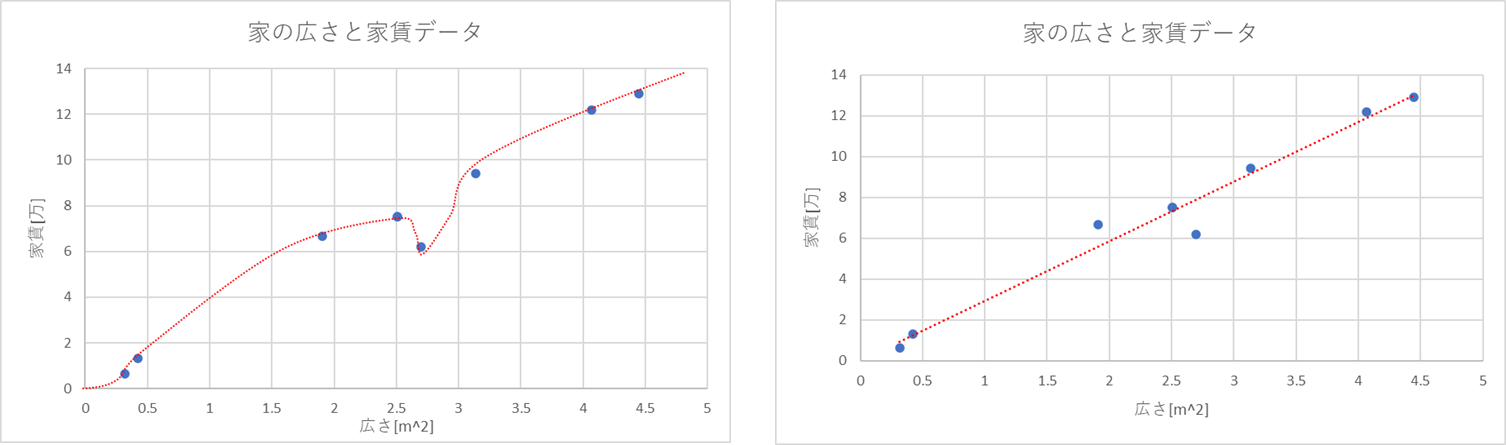


参考：https://datawokagaku.com/holdout/

### - hold-out
学習データとテストデータを分ける手法の一つ。  
ランダムに学習データとテストデータに分割する。7:3や5:5に分けるのが一般的。  
一般にデータは多い方が良いので、苦労してデータを集めても全てのデータを学習に使えないのが難点。  

また、hold-outでは学習データ、テストデータの他に学習率αなどのハイパーパラメータのチューニング用の検証データを  
用意することもある。学習したモデルに対し、検証データで精度を評価し、悪ければハイパーパラメータをチューニングする。    
検証データでモデルのハイパーパラメータを調整した後、テストデータで精度を評価するのである。  
検証データはテストデータを過学習せずにハイパーパラメータをいじるための緩衝領域のようなもの。  

※復習  
学習データを標準化してから学習するとき、テストデータも標準化する必要があるが、  
このときは学習データの平均と標準偏差を使ってテストデータを標準化することに注意。  
すなわち、学習データの平均と標準偏差はテストデータの平均と標準偏差に等しいと仮定して標準化するのである。  
これは学習データの平均と標準偏差がデータ全体の母集団の平均と標準偏差に一致すると仮定しているとも言える。  
（本来、標準化に使う平均と標準偏差は母集団のものを使うのが理想的であるから）  
学習されたモデルが広く一般のデータに対しても有効（汎化性能が高い）であることを調べたいので、このように仮定して  
標準化を行う。  

※ハイパーパラメータ： 人が決め打ちで決める値。普通のパラメータは$\theta$を指すことが多い。  



### - LOOCV(Leave-One-Out Cross Validation)
一つのデータだけテストデータとし、残りのデータで学習するということを全てのデータがテストデータになるように繰り返す。  
例えばデータが100個($x_1~x_{100}$)あったら、$x_1$をテストデータとして残りの99個で学習を行い、このときの精度を評価する。  
これをテストデータが$x_1$から$x_{100}$の100パターンで学習・評価を行う。  
したがって学習の回数・テストの回数はデータ数と同じ100回となる。  
100通りのモデルの精度の平均をとり、それをモデルのベースとなるアルゴリズムの最終的な精度とする。  
※100通りのモデルすなわち、100通りの係数群が算出されるが、このうちのどの係数を採用するかなどは考えず、  
  根底にあるアルゴリズム（線形回帰なら線形回帰）の精度を評価するのが目的。

利点・欠点は下記。  

利点:
* hold-outと違い、ランダム性がない(常に同じ結果になる。hold-outの場合はランダムにデータを選ぶので精度にばらつきが出る。)
* ほぼ全てのデータを学習に使用可能
欠点:
* データ数通りの学習を行うため、非常にコストがかかる　→実際の現場ではほとんど使われない。  

※交差検証(Cross Validation)： テストデータと学習データを入れ替えながら複数回モデルを学習し、総合的に精度を評価すること。　


### - k-Fold CV(k-Fold Cross Validation)
データをk個に分割して交差検証を行う。よく使われるのはk=5やk=10でこのときは5-fold CV、10-fold CVという。  
例えば、データが500個（$x_1～x_{500}$）の場合に5-folc CVを行う場合は、データを5グループ（1グループあたりデータ数100個）に分割する。  
次に$x_1～x_{100}$をテストデータとし、残りの4グループ（$x_{101}～x_{500}$）を学習データとして、学習・評価を行う。  
これを全グループが1回テストデータとなるように交差検証を行う。すなわち、k=5回交差検証を行うことになる。  
LOOCVと同様に各パターンにおけるテストデータでの精度を算出し、それらの平均を最終的なアルゴリズム（線形回帰等）の精度とする。  

データを分割したグループ単位で学習・テストを行うので、交差検証の回数を抑えられ、LOOCVよりコストが低い。  
現場や論文でも最も使用される評価手法である。  



### - CV時の特徴量スケーリング
CVでは毎回学習データが変わるので、都度特徴量スケーリングを行う必要がある。  
k-FoldCVを例にとると、$x_1～x_{100}$をテストデータとするとき、残りの4グループ（$x_{101}～x_{500}$の学習データの平均と標準偏差を使って、  
テストデータの学習データの標準化を行う。テストデータが他のグループとなるパターンでは学習データも変わるので、当然標準化に使う平均と標準偏差も変わる。  
したがって、学習データが変わる都度特徴量スケーリングを行う必要がある。  
cros_val_scoreメソッドを使うと、一発で交差検証から評価までしてしまうため、スケーリングを入れる余地がない。  

これを実装するためにscikit-learnのpipelineを使用する。（実装はML_notebookに記載する）

### - （超重要）Bias-Variance Tradeoff
モデルの複雑性と精度はトレードオフの関係にある。  
モデルを複雑にしていくと過学習しやすくなり、モデルが単純すぎると学習が不十分で精度がでない。  
つまり、複雑にし過ぎても単純にし過ぎても汎化性能が低下してしまうため、ちょうどいいモデルを構築することが重要となる。  
例えば、左下図のような分布の学習データに対してモデルを構築することを考える。  
赤線のように単純な線形回帰をモデルとして当てはめると、学習データに対する残差が大きく、未知のデータに対しても精度が出ないことが予想される。  
緑線のような学習データにほぼ完全にフィットしている複雑な曲線をモデルとして当てはめると、学習データに対する残差は小さいが、過学習となり汎化性能が低下する。  
一方、これらの間をとった青線のような曲線をモデルとして採用すれば、学習データに対する残差も比較的小さく、過学習も防ぐことができる。  
このように、モデルは単純過ぎても複雑すぎても精度的にダメなので、間をとったちょうどいいモデルを模索する必要がある。  

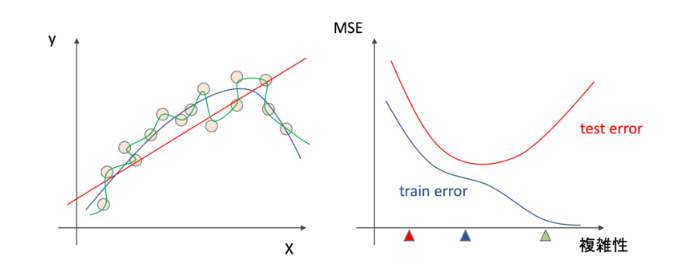  

ここでのBias（偏り）とVariance（分散）は以下の意味である。モデルの複雑さによってこれらは変動する。    
* Bias： モデルを簡略化したことによる誤差
    * 単純な線形回帰の場合、簡略化により学習データおよびテストデータに対する残差が大きい(Biasは大きい)
    * 複雑なモデルの場合、簡略化されていないので、学習データおよびテストデータに対する残差が小さい(Biasは小さい)
    <br></br>
* Variance： 学習したモデル$\hat{f}(x)$の分散（ばらつき）のこと。異なる学習データで学習したときの$\hat{f}(x)$の変動具合。  
    ※「異なる学習データ」は元の学習データと同じ母集団からランダムに抽出したものとする
    * 線形回帰の場合、学習データを変えても$\hat{f}(x)$は傾きと切片が少し変わる程度でそんなには変わらない(Var($\hat{f}(x)$)は小さい)
    * 複雑なモデルの場合、学習データを変えるとデータの分布に合わせて$\hat{f}(x)$は大きく変わる(Var($\hat{f}(x)$)は大きい)  
    →学習データによって予測値がコロコロ変わるということなので、汎化性能は低くなる。

モデルの複雑性に対するBiasとVariance、これらに対応するテストデータのMSEは下記のような関係にある。  
このような関係を常に頭に入れてモデルを構築していくこと！  
※データによって分布は異なるので、あくまでイメージ  
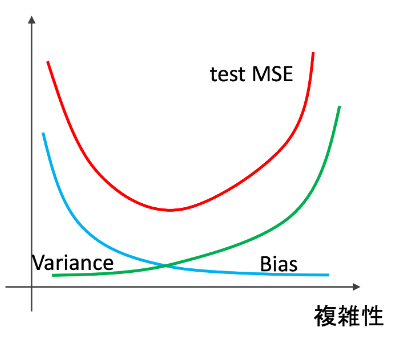  

一般に、モデルの誤差はBiasとVarianceを用いて下式で表わせる。  
精度が高いモデルを構築するにはこの誤差を減らす必要がある。  
$$E[(y_i-\hat{f}(x_i))^2] = Bias[\hat{f}(x_i)])^2 + Var(\hat{f}(x_i)) + var(\epsilon)$$

左辺は残差の平方の平均（期待値）。  
右辺のBias項とVar項は削減可能な誤差（残差）であり、  
これらをトレードオフを考慮しながらいかに削減するかが実務で求められる。Biasの項の方がVarよりも大きく誤差に寄与する。  
右辺第3項は特徴量では説明できない削減不可能な誤差である。  

モデルの精度が悪いとき、Biasの問題かVarianceの問題かがわかればなにをすればいいのかがわかる。  
* test errorもtrain errorも高い
    * →Biasの問題なので、次元をあげたり特徴量を増やす。モデルが単純すぎることが問題なので、データを増やしても効果は薄い。
* test errorは高いがtrain errorは低い
    * →Varianceの問題なので、次元を下げたり特徴量を減らす。データを増やすことで解決することもある。

※BiasとVarianceの私的覚え方  
Bias: 偏見(Bias)を持って短絡的に物事（モデル）を見てしまい、誤りが起きる。  
Variance: 周りの人たち（学習データ）が口をそろえて言っていることは正しそうに聞こえるが、別の集団は全く別のことを言っている。  

図の出典：https://datawokagaku.com/bias_variance_tradeoff/  

## ○ 回帰モデルの評価指標
未知のデータに対する回帰モデルの精度を評価するには、正しい評価指標を選択することが大事。  
回帰以外の分類などは下記とはまた別の評価指標を使う。  

### - MSE (Mean Squared Error)
最もよく使われる評価指標。残差の二乗の平均。  
二乗により単位がわかりにくいという難点がある。  
$$MSE=\frac{1}{m}\sum_{i=1}^{m}{e_i}^2=\frac{1}{m}\sum_{i=1}^{m}{(y_i-\hat{y}_i)}^2$$  

### - RMSE (Root Mean Squared Error)
MSEに平方根をしたもの。目的変数の単位と一致し解釈しやすい。
$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}{(y_i-\hat{y}_i)}^2}$$  

### - MAE (Mean Absolute Error)
シンプルに残差の絶対値の平均を指標とする。直感的でわかりやすい．よく使われる
$$MAE=\frac{1}{m}\sum_{i=1}^{m}|(y_i-\hat{y}_i)|$$


## - R-Squared($R^2$)
統計学では決定係数とも呼ばれる。  
データに対して回帰の当てはまりの良さを0~1で表す。0に近いほど残差が大きく、1に近いほど残差が小さい。  
感覚的には0.8以上はよく当てはまっている感じ。  
特徴量がどれだけ目的変数の値を説明(決定)しているのかを表す指標、言い方を変えると、  
目的変数の分散（ばらつき）が特徴量によってどれだけ説明（決定）されるかを表す指標である。  

例えば、体重を目的変数$y$、身長を特徴量$x$とするとき、得られたデータにおける身長のばらつきに対して、  
体重もばらつきがあるならば、体重の分散の一部は身長によって説明できそうである。  
この身長による体重の分散が体重の分散全体のどの程度の割合を占めるのかが決定係数の意味である。  

決定係数の数式的な定義の説明前に下記を理解しておく必要がある。  

<b>※重要※</b>  
データ一つ一つに着目すると、ある特徴量$X$の値が同じだが対応する$y$の値が異なるということはあり得る。  
例えば、身長が160cmだが体重が50kg,56kg,70kg・・・など。※身長の小数点以下は考えないものとする。  
このとき、$x_j=160$に対して無数に$y_{x_j}$があると考えたとき、最小二乗法によって得られた$x_j=160$における$y$の予測値は、  
$x_j=160$における$y$の条件付き平均値$\bar{y}_{x_j}$と等しくなる。　※実際は無数のデータは無理なので、平均値に近い値となる  
これは最小二乗法のプロセスを考えるとわかる。  
全学習データを使って、真の値と予測値の差（残差）の平方和を最小にするように最急降下法などでパラメタを算出していく(=予測値を求めていく)のであるから、  
当然$x_j=160$における無数の$y_{x_j}$のデータの残差の平方和の項も小さくなるように予測値が決まっていく。  
このとき残差の平方和が最も小さくなるのは、予測値の値が$y_{x_j}$の平均値の時であるから、イテレーションを無限に繰り返せば予測値は平均値と等しくなる。  
以上より、線形回帰は特徴量$X$の各値$x_j$における目的変数の条件付き平均値を求めているともいえる。  
（復習：平均値は各値からの差の2乗の合計 (ここでは残差) を最小にするという定理）

上記を踏まえて、特徴量$x=x_i$における目的変数を$y_i$、予測値を$\bar{y}_{x_i}=\hat{y}_{x_i}$とすると、  
それぞれ以下のような関係にあることがわかる。  
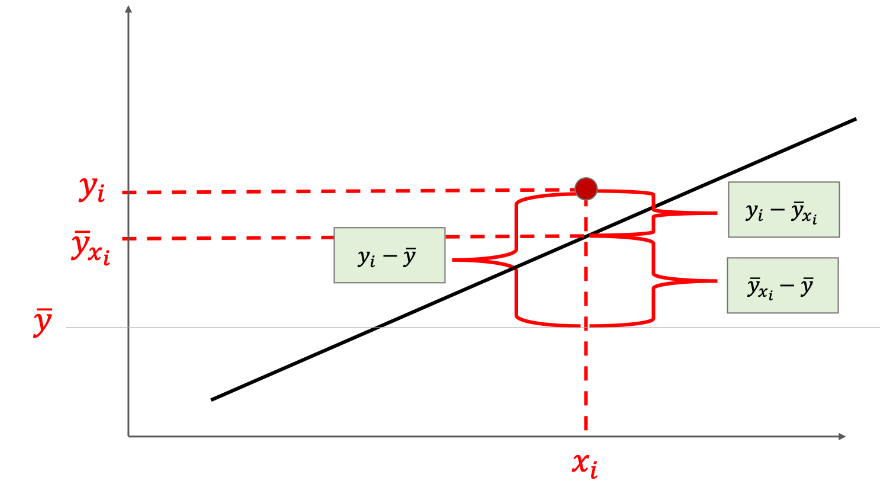  

出典：https://datawokagaku.com/r_squared/  

上図より、yの偏差$y_i-\hat{y}$は、   
$$y_i-\hat{y} = (\bar{y}_{x_i} - \bar{y}) + (y_i - \bar{y}_{x_i})$$
とかける。  
右辺の括弧で囲まれた第1項はxと回帰直線によって決まるため、yの偏差のうち特徴量$x$によって説明される部分といえる。  
第2項は特徴量$x$によって説明されない部分である。  
証明は省略するが、上記の関係からyの分散は下記のように書ける。1/mは省略。    
$$\sum_{i=1}^{m}{(y_i-\bar{y}_i)}^2=\sum_{i=1}^{m}{(\bar{y}_{x_i}-\bar{y}_i)}^2+\sum_{i=1}^{m}{(y_i-\bar{y}_{x_i})}^2$$  

yの分散のうち、右辺第1項がxによって説明される部分である。  
決定係数$R^2$はyの分散がxによってどれだけ説明されるかを表す指標であることから、下記のように定義する。    
$$R^2:=\frac {\sum_{i=1}^{m}{(y_i-\bar{y}_i)}^2 - \sum_{i=1}^{m}{(y_i-\bar{y}_{x_i})}^2}{\sum_{i=1}^{m}{(y_i-\bar{y}_i)}^2}$$

分散なので、$s^2$やRSS,TSSを用いて下記のようにあらわすことも多いので合わせて覚える。  
$$R^2 = \frac{{s_y}^2-{s_{y・x}}^2}{{s_y}^2}=1 - \frac{{s_{y・x}}^2}{{s_y}^2}$$
$$R^2=1- \frac{\sum_{i=1}^{m}{(y_i-\bar{y}_{x_i})}^2}{\sum_{i=1}^{m}{(y_i-\bar{y}_i)}^2}=1- \frac{\sum_{i=1}^{m}{(y_i-\hat{y}_i)}^2}{\sum_{i=1}^{m}{(y_i-\bar{y}_i)}^2}=1 - \frac{RSS}{TSS}$$

<br></br>
長々と書いたが、要は<b>決定係数は真の値yの分散(≒TSS)のうち特徴量xによらない分散（≒RSS）の割合を除いた割合である</b>。  
決定係数の重要な性質として、特徴量が一つしかない場合、学習データにおけるR-squaredは相関係数rの二乗と等しくなるというものがある。    

### - adjusted R-Squared (調整済み$R^2$)
目的変数に対する特徴量の寄与率を確認するケースでは学習データに対しての$R^2$を見ることがある。  
$R^2$は（目的変数に無関係の特徴量でも）特徴量を追加すると1に近づくという性質がある。  
イメージとしては、無制限に特徴量を追加すると過学習気味になり$\hat{y_i}$が${y_i}$に近づきRSSが小さくなるため。  
RSSが小さくなるので、$R^2$は1に近づいていく。  
これでは特徴量の寄与率を正しく評価できないので下式のようにRSS,TSSそれぞれの自由度で調整された決定係数を用いて評価する。  

$$adjusted R^2=1- \frac{\frac{RSS}{m-n-1}}{\frac{TSS}{m-1}}$$

※TSSは特徴量によらないので自由度はm-1

## ○ 非線形回帰
真の値が線形回帰モデルで説明できることは現実的にまずない。そこで、非線形モデルが必要になる。  
非線形回帰の実装およびモデルを構築する方法として、ここでは「多項式特徴量」、「kNN」について記す。  
※多項式特徴量は線形回帰の拡張であり、非線形モデルとは呼ばないことに注意。


### - 多項式特徴量(Polynomial Features)
多項式回帰(Polynomial Regression)ともいう。線形回帰の特徴量を多項式化することで非線形化する。※非線形モデルとは呼ばない  
例えば、$f(X)=\theta_0 + \theta_1X_1$という線形回帰モデルがあったとき、  
$X_1$を$X_1+{X_1}^2+{X_1}^3+...{X_1}^d$のように多項式に置き換える。すると、  
$g(X)=\theta_0 + \theta_1X_1+ \theta_2{X_1}^2+ \theta_3{X_1}^3+ ... + \theta_d{X_1}^d$  
のように非線形の形にすることができる。使うのは多くても3次多項式まで。  

${X_1},{X_1}^2,{X_1}^3 ...$をそれぞれ全く別の特徴量とみなすと、g(X)は線形回帰モデルと同じ形であるため、  
g(X)を非線形モデルとは呼ばない。
もう少し踏み込むと、置き換え前の特徴量空間（特徴量が$X_1$のみ。横軸が$X_1$）でg(X)を見ると非線形に見えるが、  
置き換え後の特徴量空間（特徴量が$X_1,{X_1}^2,{X_1}^3 ...$と考える）で例えば${X_1}^2$を横軸にとってg(X)を見ると、  
${X_1}^2$に単に比例しているように見えるので、線形のままに見えることに注意。（ここでの${X_1}^2$を横軸にとるとは、他の特徴量を定数とみなすということ。）  
なので、多項式特徴量は線形回帰の拡張であるため、非線形モデルとは言わない。  


特徴量が複数ある場合は交互作用項を作ることもできる。交互作用項を使う場合はそれぞれの特徴量も使うのが一般的（t検定で対立仮説が成り立たなかったとしても）。  
全ての交互作用項や多項式項を使う必要はない。明らかに目的変数と関係なさそうなものは採用しない。  
交互作用項は例えば、目的変数が家賃で特徴量が「広さ」と「駅からの距離」のとき、広くて駅から近いと相乗効果でさらに家賃が上がるといったことを表現するのに使う。  

線形回帰モデル（特徴量2つ）： $f(X)=\theta_0 + \theta_1X_1 +\theta_2X_2$  
多項式回帰モデル（交互作用項含む）： $g(X)=\theta_0 + \theta_1X_1+ \theta_2{X_2}+ \theta_3{X_1}^2+ \theta_4{X_2}^2+ \theta_5{X_1}{X_2}$  

※気になること  
交互作用項を含めることによって、それぞれの特徴量のt値が下がる（p値があがる）ことはある。  
多項式特徴量はマルチコ的に大丈夫なのかな？    


### - kNN(k Nearest Neighbor: k最近傍法)
分類でよく使われるが、回帰にも使える(kNN回帰)。予測したいデータに最も近いk個の学習データの平均を予測値とする方法。    
数式モデルを使わないノンパラメトリックな非線形回帰モデルである。  
機械学習におけるモデルには大きく分けてパラメトリックなモデルとノンパラメトリックなものがある。  
$f(X)=\theta_0+\theta_1X_1+\theta_2X_2$のような線形回帰モデルはパラメタ$\theta$の値で決まるパラメトリックなモデルである。  
パラメトリックなモデルは解釈性が高いが、数式で表現される範囲でしか予測値を表現できないため、柔軟性に欠ける。    
一方でノンパラメトリックなモデルは特定の数式の形に当てはめずにデータの特性・分布などから予測値を算出するため、  
柔軟性が高く精度が高い回帰直線を引くことができる。    
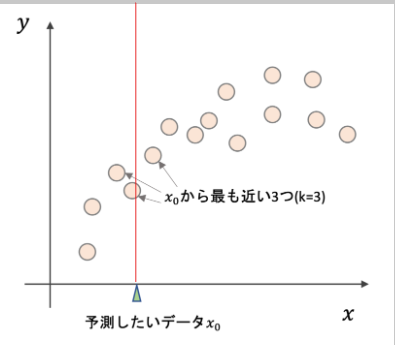  

出典：https://datawokagaku.com/knn/

このアルゴリズムを数式で表現する（モデルではない）と、  
$$\hat{f}(x_0)=\frac{1}{k}\sum_{x_i\in{N_0}}y_i$$

※$x_i\in{N_0}$は$x_0$から最も近いk個の領域$N_0$の中にある学習データ$x_i$という意味。

$x_0$から各データへの距離の定義は基本的にユークリッド距離($\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$)を使う。  
kNNのような学習データとの距離ベースのアルゴリズムでは特徴量スケーリングが必要なので注意。  
ただし、特徴量が一つのときは不要。  

※アルゴリズムの実際の中身  
ある特徴量x_testにおける目的変数y_targetを予測したいとする。（簡単のため特徴量は1つとする）  
x_testだけ与えても近傍の3点はわからない。（ちょうど上図$x_0$の直線上に無数にyの候補があるイメージ。x軸方向に近い3点はわかる。）  
ではどうやって最も近い3点を算出するか？これはkNNの説明文のミスリードかも。（一言で説明するためには仕方ないが）  
「予測したいデータに最も近いk個の学習データの平均を予測値とする」よりかは、  
「特徴量x_testを与えたとき、最も3点に近くなるy_targetの値は3点のyの平均値となる。これをy_targetの予測値として採用する」  
といった方が数学的、アルゴリズム的には正しいと思う。  
つまり、アルゴリズムの実装的にはまず3点からの距離の総和を最小にするようなy_targetを求めていると思われる。  
(これは平均値の定理からy_targetが3点のyの平均値となるときだとわかるので、特別な計算はしてないだろう。)  


### - kNNと線形回帰
* 線形回帰の利点
    * 学習が簡単
        * 正規方程式を解けば良いだけ。
    * 解釈しやすい
        * 数式でパッとわかる。
    * 仮説検定が可能
        * kNNでは目的変数に対する各特徴量の寄与具合は評価することができない
    * 未知のデータのスケールによらず、予測が可能
        * kNNでは学習データのスケール外のデータに対してはほぼ予測ができない。  
          スケール外に対する予測値は全て直近の3点の平均値の値を採用することになる。
<br></br> 
* 線形回帰の欠点
    * 線形以外のモデルを作ることができない
    * 真の$f$が線形な場合以外は概ねkNNより精度が低い

## ○ 正則化項
線形回帰の精度と解釈性をさらに向上させるためのもの。    
最小二乗法の損失関数の式に、正則化項と呼ばれるペナルティを課す項をつける。  
パラメータ$\theta$が大きくなると損失が増えるようにすることで、パラメータ$\theta$が大きくならないようにする。  

通常の損失関数：  
$$L(\theta)=\sum_{i=1}^{m}\lbrace{y_i-(\theta_0+\sum_{j=1}^{n}\theta_jx_{ij})}\rbrace^2$$  

正則化項つきの損失関数：  
$$L(\theta)=\sum_{i=1}^{m}\lbrace{y_i-(\theta_0+\sum_{j=1}^{n}\theta_jx_{ij})}\rbrace^2 + \lambda\sum_{j=1}^{n}{\theta_j}^2$$ 
または、
$$L(\theta)=\sum_{i=1}^{m}\lbrace{y_i-(\theta_0+\sum_{j=1}^{n}\theta_jx_{ij})}\rbrace^2 + \lambda\sum_{j=1}^{n}|\theta_j|$$ 

上式の右辺第二項のL2ノルムは"Ridge"と呼ばれ、下式の右辺第二項のL1ノルムは"Lasso"と呼ばれる。  
$\lambda$はノルムの調整用。  

上記のように正則化項をつけることで、最小二乗法の過程の中でパラメタが大きくなり第1項が小さくなろうとしても、第2項による損失が大きくなるので、  
(bias-variance Tradeoff的に)必要以上にパラメタが大きくなるのを防げる。  

正則化項をつけてパラメータ$\theta$が大きくならないようにするのは、varianceを下げるためである。  
一般に線形回帰は、特徴量数が多いとlow bias high varianceになりやすい（複雑なモデルになりやすい）ため、varianceを下げる必要がある。  
正則化項をつけることでつけない場合よりも最終的なパラメタが小さくなる、すなわち特徴量の影響が減るため、複雑性が下がる。  
その結果Bias（簡略化による誤差）が大きくなり、トレードオフによりVarianceが小さくなるので、正則化項をつけた方が汎化性能が高くなる。  
(復習：bias-variance Tradeoffの図参照)    

※パラメタが小さくなることでBiasが上がるイメージ  
$\hat{y}=10+0.5X_1$　→　$\hat{y}=10+0.1X_1$  
左から右のようにパラメタが小さくなると、目的変数に対する特徴量$X_1$の寄与は小さくなり、相対的に定数項による寄与が大きくなる。  
定数項で目的変数を説明しようとするのはまさに簡略化であり、実態との誤差が生じる。つまり、Biasが大きくなる。  

### - Ridge
L2ノルムの正則化項を使用する。  ※復習：ノルムとは大きさを意味するのであった。  
$\lambda$を大きくするにつれ各特徴量の係数の絶対値は小さくなる（$\lambda$の値によっては一時的に大きくなる場合も）  
特徴量同士のスケールが影響するので事前に特徴量スケーリングが必要であることに注意。  
学習後、係数が完全にゼロになることはなく全ての特徴量の係数が残る。($\theta_j≠0$)  

$$L(\theta)=\sum_{i=1}^{m}\lbrace{y_i-(\theta_0+\sum_{j=1}^{n}\theta_jx_{ij})}\rbrace^2 + \lambda\sum_{j=1}^{n}{\theta_j}^2$$ 

上式の正規化項は各特徴量の係数が大きくなることを抑える役割があることから、$\lambda$が決まっていれば$\sum_{j=1}^{n}{\theta_j}^2$はある一定以上は大きくならない。  
したがって$\lambda$に対応して決まる定数を$s$とすると、$\lambda\sum_{j=1}^{n}{\theta_j}^2 \le s$と書ける。  
このとき$\lambda$も定数なので右辺の定数$s$に吸収させると、$\sum_{j=1}^{n}{\theta_j}^2 \le s$となる。  
すると、上式は  
「制約$\sum_{j=1}^{n}{\theta_j}^2 \le s$のもと、$L(\theta)=\sum_{i=1}^{m}\lbrace{y_i-(\theta_0+\sum_{j=1}^{n}\theta_jx_{ij})}\rbrace^2$を最小化する」  
という意味と捉えることができる。  

特徴量が2つ($\theta_1$と$\theta_2$)のケースにおいて、これを図示すると、  
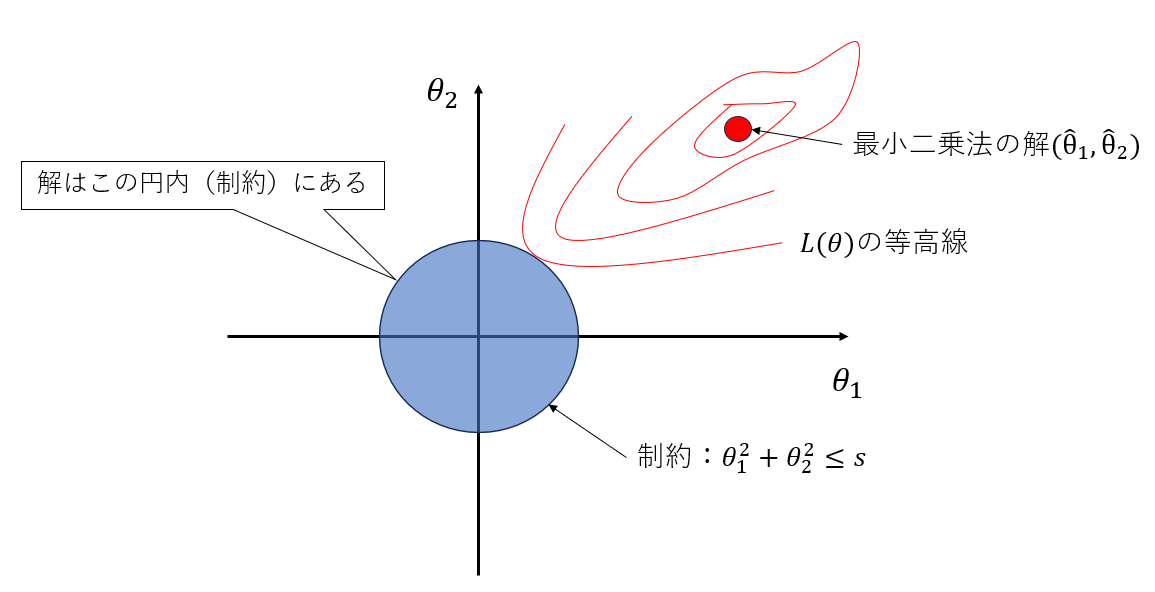

※($\hat{\theta_1},\hat{\theta_2}$)は正規化項がない場合における最小二乗法の最適解  

上図の通り、制約を満たす$\theta_1$と$\theta_2$は円の中にあり、この条件の下で$L(\theta)$を  
最小にする解($\hat{\theta_1},\hat{\theta_2}$}は円と$L(\theta)$の等高線の接点となる。  
（最急降下法で考えると、算出されるパラメタは円の内側にあり、イテレーションを繰り返すと円周上の接点に近づいていくイメージ。）  
円の半径$s$は$\lambda$に対応して決まる定数なので、$\lambda$を大きくすると、半径は小さくなる。$\lambda$を小さくすると、半径は大きくなる。  

上図は非常に重要なので頭に入れておくこと！


### - Lasso
L1ノルムの正則化項を使用する。
$\lambda$を大きくするにつれ各特徴量の係数の絶対値が小さくなり、やがて完全に0になる。  
0になる$\lambda$は係数によって異なる。完全に0になること、0になるスピードが係数によって異なることがRidgeと違う点である。  
特徴量同士のスケールが影響するので事前に特徴量スケーリングが必要。   

上記の特性から、Lassoは学習後に一部(or全て)の特徴量の係数が0になることを期待して使われる。  
Lassoは特徴量選択を自動で行うアルゴリズムとも言える。

$$L(\theta)=\sum_{i=1}^{m}\lbrace{y_i-(\theta_0+\sum_{j=1}^{n}\theta_jx_{ij})}\rbrace^2 + \lambda\sum_{j=1}^{n}|\theta_j|$$ 


上式の正規化項は各特徴量の係数が大きくなることを抑える役割があることから、$\lambda$が決まっていれば$\sum_{j=1}^{n}|\theta_j|$はある一定以上は大きくならない。  
したがって$\lambda$に対応して決まる定数を$s$とすると、$\lambda\sum_{j=1}^{n}|\theta_j| \le s$と書ける。  
このとき$\lambda$も定数なので右辺の定数$s$に吸収させると、$\sum_{j=1}^{n}|\theta_j| \le s$となる。  
すると、上式は  
「制約$\sum_{j=1}^{n}|\theta_j| \le s$のもと、$L(\theta)=\sum_{i=1}^{m}\lbrace{y_i-(\theta_0+\sum_{j=1}^{n}\theta_jx_{ij})}\rbrace^2$を最小化する」  
という意味と捉えることができる。  

特徴量が2つ($\theta_1$と$\theta_2$)のケースにおいて、これを図示すると、  
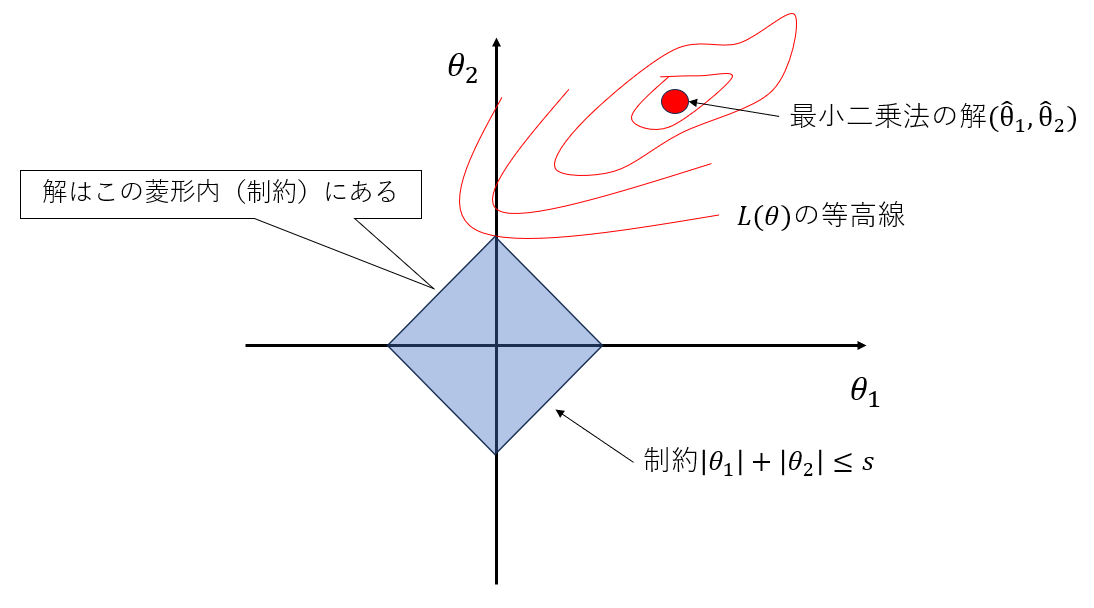

※($\hat{\theta_1},\hat{\theta_2}$)は正規化項がない場合における最小二乗法の最適解  

上図の通り、制約を満たす$\theta_1$と$\theta_2$はひし形の中にあり、この条件の下で$L(\theta)$を  
最小にする解($\hat{\theta_1},\hat{\theta_2}$}はひし形と$L(\theta)$の等高線の接点となる。  
このように制約がひし形で角があり、ここが接点（最適解）になりやすいのでLassoでは係数が0になりやすい。  
（最急降下法で考えると、算出されるパラメタはひし形の内側にあり、イテレーションを繰り返すとひし形の周上の接点（特に頂点）に近づいていくイメージ。）  
ひし形の辺の長さ$s$は$\lambda$に対応して決まる定数なので、$\lambda$を大きくすると、辺は短くなる。$\lambda$を小さくすると、辺は長くなる。  


### - RidgeとLassoの比較
* Ridgeは、学習しても全ての特徴量が必要になる
* Lassoは、学習すると一部の特徴量が不要になる。
* どちらも事前に特徴量スケーリングが必要。
* 目的変数に関連する特徴量が多い場合はRidgeの方が精度が高い。  
  本当は関連する特徴量が多いのにLassoを選んでしまうと、それらの係数も0になってしまい、精度が出ないため。
* 目的変数に関連する特徴量が少ない場合はLassoの方が精度が高い。  
  本当は関連する特徴量が少ないのにRidgeを選んでしまうと、それらの係数は消えず、Varianceが高くなってしまうため。  
→★関連する特徴量の数は事前に正確にわからないのでk-FoldCVで汎化性能が高い方を選ぶ。どちらかといえばLassoを使うケースが多い。

※正規化項の意義  
正規化項をつけずに求めた最小二乗法の解は学習データとの残差を最小にするものであるため、過学習気味になっている。  
この過学習を防ぐために、あえて制約をつけて少し解をずらしていると考えることができる。  